# C-OPS data processing for C-HARRIER MISSIONS
## Processing for individual C-air files

This script allows for fast and easy quicklooks of C-OPS radiometry data for data efficacy checks. The following script processes individual C-OPS C-air files for a given flight mission, which provide the radiometric science data.

In [1]:
## IMPORT NECESSARY LIBRARIES 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import matplotlib.dates as mdates

### Inputs
In the following cell, input the sensor you wish to process (sensor), the date of of the collection (date), the path to the days files (path), the actual filename you wish to process (fname), and the path where you wish to save the figure (outpath).

In [8]:
sensor = 'es'
date = '20211028'
path = '/Users/jakravit/OneDrive - NASA/C-HARRIER_2021_C-AIR/C-AIR/today20211028/'
fname = '301214525.csv'
outpath = '/Users/jakravit/Desktop/Cair_figs/'

### Read Data

The following cell reads the data and splits into the three sensors.

In [9]:
file = path+fname
data = pd.read_csv(file, sep=',', encoding='ISO-8859-1', index_col='DateTimeUTC')
data.index = pd.to_datetime(data.index)  
sensors = {'es': data.iloc[:,5:24],
            'li': data.iloc[:,24:43],
            'lt': data.iloc[:,43:]}
name = fname[:-4]

## Plot Data
The following cell plots the individual sensor data as a function of time. X-axis is in form of Hour:Minute:seconds.

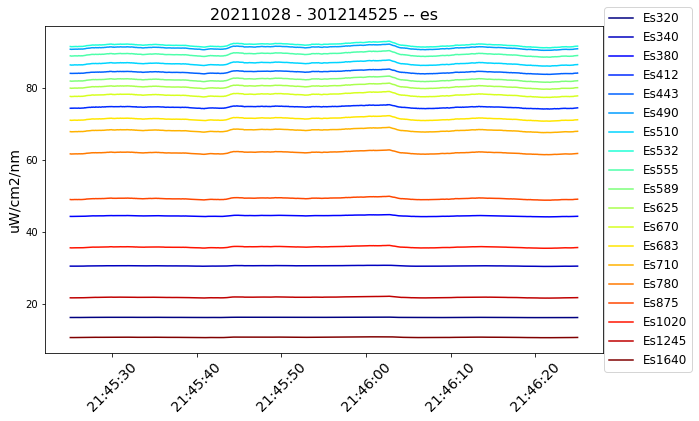

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, sensors[sensor].shape[1]))))
labels = []

for i,b in enumerate(sensors[sensor].columns):
    ax.plot(data.index,data[b])
    labels.append('{}'.format(b.split(' ')[0]))

ax.legend(labels,loc='right',bbox_to_anchor=(1.17, .5),fontsize='large')
plt.xticks(rotation=45,fontsize=14)
ax.set_ylabel('uW/cm2/nm',fontsize=14)
ax.set_title('{} - {} -- {}'.format(date,name,sensor),fontsize=16)

fig.savefig(outpath+'{}_{}_{}'.format(date,name,sensor),bbox_inches='tight',dpi=300)